# <center> BEST ITMGT GROUP <center> - STOCK EXCEL OUTPUT -
### <center>195227 – VICEDO, Rafael Enrique G. <center>190277 - ANG, Ryan Mitchel P. <center>191154 - CHUA, Allen James G.<center>191070 - CHAN, Ian Stanford D.<center>194552 - SEE, Eira Janelle B.

--------------

## <center> Welcome!

If you're interested in the Philippine stock market, then you're in luck! This code is what a user can use to get Excel spreadsheets of the Philippine stock market. Here's what a user can expect from this code:<br><br>

* <b>Closing data of all stock companies</b> - A user can find all the data pertaining to each company's stock, such as the <i>close amount</i>, <i>percentage change from last close price</i>, and <i>volume</i>. <br><br>

* <b>Selective data on user-selected companies</b> - A user can access company history and create a table and line graphs that tracks the performance of specific companies in specific timespans - from days, weeks, to years! This makes it easier to visualize trends and saves users in having to create the visualization themselves. New worksheets will be created for each company selected.<br><br>
    
* <b>Date specification</b> - The user can input the date range of the stock they wish to analyze for their visual data. Existing data will be added to the Excel file and non-existent data will be ignored.<br><br>
    
* <b>File name</b> - A user can choose the name for the Excel file. The current date will be automatically added to the specified name to account for older files.
<br><br>

### Some important notes:

Take note that for this code to work, <b><i>you must install `fastquant`</i></b>, which provides the data regarding the stock history of the Philippine Stock Index. We've provided the download and install code below.
  
Additionally, <b><i>data can only be retrieved from about 5 years prior</b></i> to the current date, or 1828 days. Stocks also may or may not exist anymore due to the shifting economic climate. So, <i><b>data may not exist in the user specified date range</b></i> and an error can occur. Please take this into account when executing the code.
    
The whole process for getting the stock data can take, at the very least, <b><i>4-5 minutes with good WiFi</i></b> to type the requested companies, gather the stock history data, and output the Excel files. Note that the more companies requested & the longer date range is, the longer it will take to output. Of course, internet connection is REQUIRED for this code to work (data retrieval is an online process).<br>
    
There can also be instances where the data fails to be retrieved. This can be caused by either internet connectivity issues or problems with the fastquant database. In this case, the cell and succeeding cells must be re-run. The retreival of this data may be slower and more cumbersome than other paid APIs, but the benefit here is that <b><u>fastquant is free</b></u>, and there is no permanent data storage for this process.


## Installing `fastquant`

In [1]:
!pip install fastquant

## Imports

In [2]:
# Used for historical data and graphical analysis
from fastquant import get_pse_data, backtest

# Used for creating Excel files and dataframes
import pandas as pd
from pandas import ExcelWriter
import xlsxwriter
from xlwt.Workbook import *

# For graphing the data
import matplotlib.pyplot as plt

# ESSENTIAL for getting date input and getting current date and time
import datetime
from datetime import date, timedelta

# Regular expression patterns
import re
import numpy as np

# For editing the Excel files and adding graph images
import openpyxl
from openpyxl import load_workbook
from openpyxl.drawing.image import Image
from openpyxl.styles import PatternFill, Border, Side, Alignment, Protection, Font

#for getting current path
import os

#for phisix data
import requests
import json

### Stock Quote Data - Request for PhiSix Data

In [3]:
# Importing the data from the .json database
phisix_stock_data = requests.get("http://phisix-api4.appspot.com/stocks.json")

#phisix_stock_data.text
print(type(phisix_stock_data))

<class 'requests.models.Response'>


In [4]:
#Loading the data from a string into .json data that is readable in Python
dictionaryload = json.loads(phisix_stock_data.text)

#Getting the list of companies with market data
market_data = dictionaryload["stock"]
market_date = dictionaryload["as_of"]

#A ticker list of all 247 companies
tickerlist = [company["symbol"] for company in market_data]

In [5]:
#Converting dict into a list in preparation
symbol = []
amount = []
percent_change = []
volume = []
name = []

for company in market_data:
    symbol.append(company["symbol"])
    amount.append(company["price"]["amount"])
    percent_change.append(company["percent_change"])
    volume.append(company["volume"])
    name.append(company["name"])

stock_quotes_dict = {}
stock_quotes_dict["Company Name"] = name
stock_quotes_dict["Symbol"] = symbol
stock_quotes_dict["Close Amount (PHP)"] = amount
stock_quotes_dict["Percent Change"] = percent_change
stock_quotes_dict["Volume"] = volume

stockdf = pd.DataFrame.from_dict(stock_quotes_dict)

# <center> ------------------------ ENTER INPUTS IN THE CELL BELOW ------------------------

In [6]:
usertickerlist = []
userdatelist = []
askmore = "y"


numdays = 1828
base = datetime.date.today()
date_list = [base - datetime.timedelta(days=x) for x in range(numdays)]
pattern = r"^\d{4}-\d{2}-\d{2}$"


# This code asks for the ticker symbols for companies that the user want to analyse on graphs

print("========================= WELCOME ========================\nPlease use uppercase letters when entering ticker symbols\n")

while askmore == "y" or askmore == "Y": 
    try:
        userticker = str(input("Enter a company ticker for graph analysis and data gathering:\nEx. BPI, JFC, BDO\n"))
        if userticker not in tickerlist:
            print("Please enter a valid ticker - perhaps your ticker is not all capitalized")
            continue
        elif userticker in usertickerlist:
            print("Company already selected!")
            continue
        else:
            usertickerlist.append(userticker)

            while True:
                try:
                    inputdate = str(input("Please enter a past date for graph of stock's history.\nPlease note that date can only go up to 5 years before current date.\n\nSyntax:   YYYY-MM-DD\nExample: '2015-04-23'\n"))
                    enteredDate = datetime.datetime.strptime(inputdate,'%Y-%m-%d').date()
                    # Validating if the entry is an existing date and not a phony (ex. 9999-99-99)
                    if re.match(pattern,inputdate) and enteredDate in date_list:
                        validdate = enteredDate
                        inputdate_to_today = ( date.today() - validdate )
                        data_period = str(date.today() - timedelta(days=inputdate_to_today.days) )
                        userdatelist.append(data_period)
                        break
                    else:
                        print("Invalid Date - Date may not exist or wrong syntax")
                        continue

                except:
                    print("Invalid syntax")
                    continue
            
        askmore = str(input("\nDo you want to choose more companies?\n [Y] = Yes\t [Other] = No\n"))
        if askmore == "Y" or askmore == "y":
            continue
        else:
            break
            
    except ValueError:
        print("Please enter a valid input.")
        continue

# ===================================================================================================

# This code asks for the a date in the past, with the limit being 1827 days before the current date. 
# The date is validated and, if it is a valid date, is assigned to variable 'validdate' for graphing


        
file = input("\nWhat would you like your excel file to be named?\n")
path = os.getcwd()

print("\n========================= NOTES ========================")
print("\nIt takes approximately 1min to get the stock quotes and 2-3min per company to gather its history. ")
print("\nThis code will install fastquant to be able to gather data using pip install.\nPlease ensure that permissions are granted. \nInstallation may take a few minutes")
print("\nResulting files: Excel with all stock quotes, historical data of specified company & its graph, png of graph(s)")
print("\nResulting file can be found at:", path)


========================= WELCOME ========================
Please use uppercase letters when entering ticker symbols

Enter a company ticker for graph analysis and data gathering:
Ex. BPI, JFC, BDO
JFC
Please enter a past date for graph of stock's history.
Please note that date can only go up to 5 years before current date.

Syntax:   YYYY-MM-DD
Example: '2015-04-23'
2019-01-01

Do you want to choose more companies?
 [Y] = Yes	 [Other] = No
y
Enter a company ticker for graph analysis and data gathering:
Ex. BPI, JFC, BDO
GLO
Please enter a past date for graph of stock's history.
Please note that date can only go up to 5 years before current date.

Syntax:   YYYY-MM-DD
Example: '2015-04-23'
2019-01-01

Do you want to choose more companies?
 [Y] = Yes	 [Other] = No
y
Enter a company ticker for graph analysis and data gathering:
Ex. BPI, JFC, BDO
EMP
Please enter a past date for graph of stock's history.
Please note that date can only go up to 5 years before current date.

Syntax:   YYYY-


# <center> -----------------------------------------------------------------------------------------

## Creating Filename

In [7]:
#getting current date and time
now = datetime.datetime.now()
dt_string = now.strftime("%d-%m-%Y")

file = file + " " +  dt_string + ".xlsx"

# <center> Getting Data from Fastquant & Plotting Graphs

In [8]:
# Date today
today = str(date.today())

# Tickers that work
workingtickers = []

#dataframes
df200 = []

for x in range(0,len(usertickerlist)):
    ticker = usertickerlist[x]
    daterange = userdatelist[x]
    
    try:
        #get the date 200 days before the input date for data extraction
        daterangeformat = datetime.datetime.strptime(daterange,'%Y-%m-%d').date()
        days200 = str(daterangeformat - timedelta(days=200))
        
        #extract df
        x_df = get_pse_data(ticker,days200,today)
        
        #add df to list for 200 days before entered date
        df200.append(x_df)
        
        #tickers that reach the end of the loop
        workingtickers.append(ticker)
        
        continue
        
    except:
        print("Failed to retrieve data for {}".format(ticker))
        continue


106it [00:45,  2.36it/s]
106it [00:45,  2.74it/s]
106it [00:45,  2.87it/s]
106it [00:41,  2.77it/s]


In [9]:
#dataframe lists starting from different dates
df50 = []
df20 = []
df = []

#Create excel file
writer=ExcelWriter(file,engine='xlsxwriter')

#create excel sheet for stock quotes
stockdf.to_excel(writer,"Stock Quotes")

for c in range(0,len(workingtickers)):
    try:
        #get ticker and corresponding date input
        ticker = workingtickers[c]
        daterange = userdatelist[c]
        
        #format date
        #daterangeformat = datetime.datetime.strptime(daterange,'%Y-%m-%d').date()
        df200[c]["Date"] = df200[c].index.astype(str).str[:10]
        df200[c]["Date"].replace("/","-")
        pd.to_datetime(df200[c]['Date'], format="%Y-%m-%d")

        #dataframe 50days before input date
        days50 = str(daterangeformat - timedelta(days=50) )
        name50 = df200[c][df200[c]['Date']>days50]
        df50.append(name50)
        
        #dataframe 20days before input date
        days20 = str(daterangeformat - timedelta(days=20) )
        name20 = df200[c][df200[c]['Date']>days20]
        df20.append(name20)
        
        #dataframe starting from input date
        name = df200[c][df200[c]['Date']>data_period]
        name.to_excel(writer,ticker+"Data")
        df.append(name)
        
        continue
        
    except:
        print("Failed to retrieve data for {}".format(ticker))
        continue
        
writer.save()    

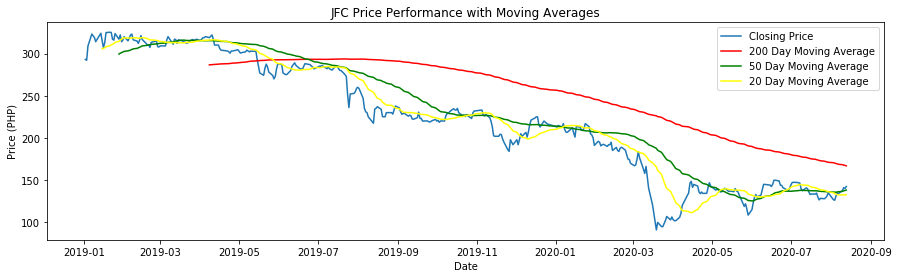

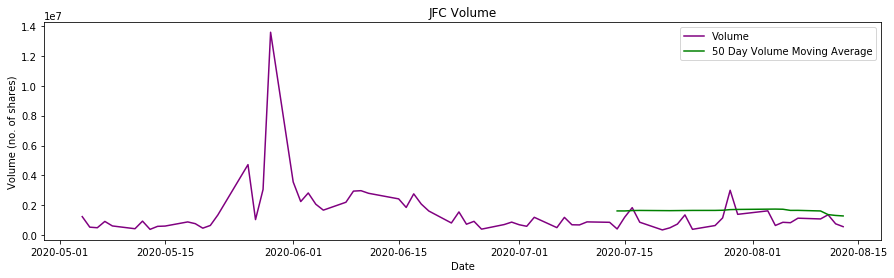

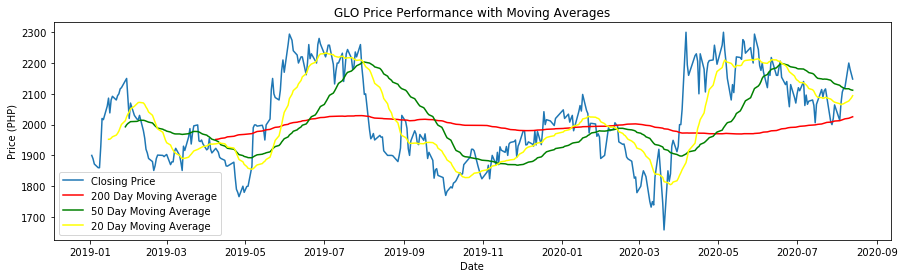

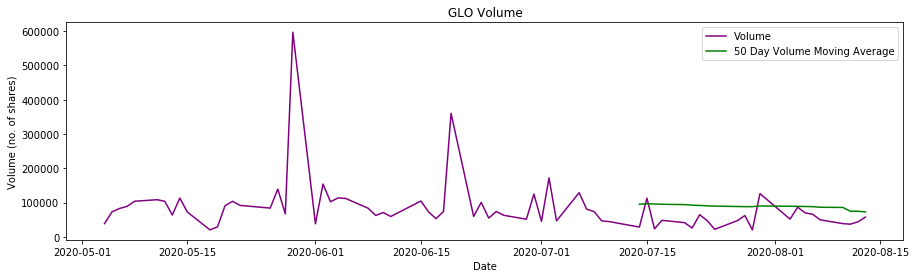

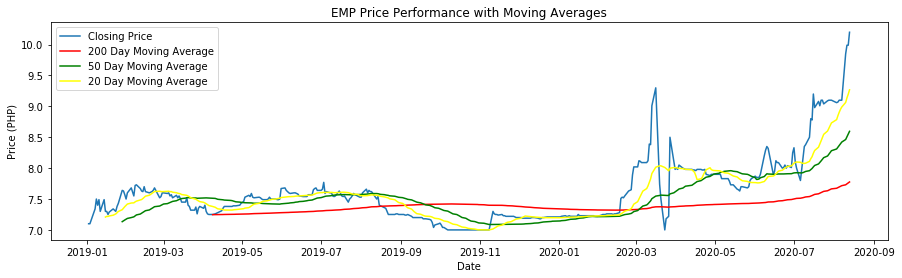

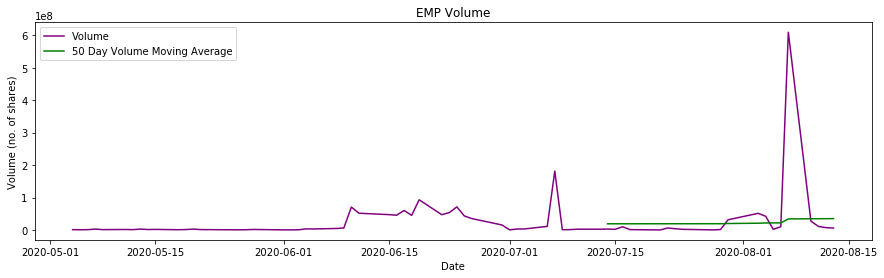

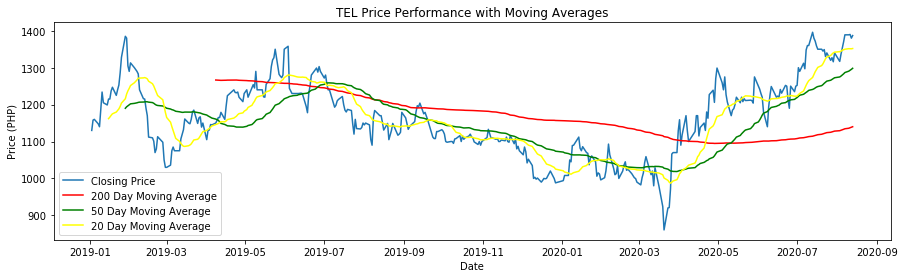

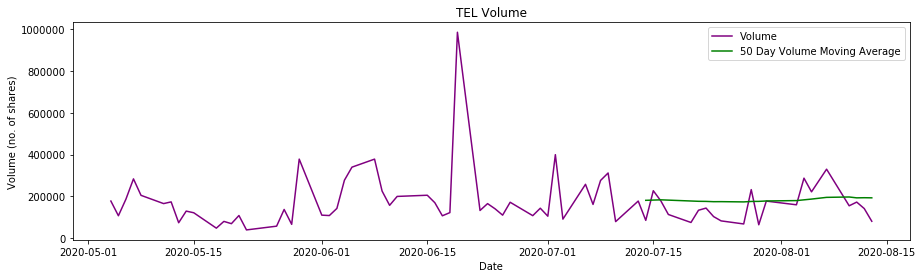

In [10]:
for x in range(0,len(workingtickers)):
    ticker = workingtickers[x]
    
    try:
        #moving averages - 200, 50, 20 days
        moveavg200 = df200[x].close.rolling(200).mean()
        moveavg50 = df50[x].close.rolling(50).mean()
        moveavg20 = df20[x].close.rolling(20).mean()

        #Price Performance and Moving Average Grpah
        stock_figure = plt.figure(figsize=(15,4))
        ax = stock_figure.add_subplot(1,1,1)
        ax.plot(df[x].close, label="Closing Price")
        ax.plot(moveavg200,label="200 Day Moving Average",color="red")
        ax.plot(moveavg50,label="50 Day Moving Average",color="green")
        ax.plot(moveavg20,label="20 Day Moving Average",color="yellow")
        ax.set_title(ticker+" Price Performance with Moving Averages")
        ax.set_xlabel("Date")
        ax.set_ylabel("Price (PHP)")
        #plt.xlim(200,len(df[x]))
        ax.legend()
        stock_figure.savefig(today+ticker+" Price Performance with Moving Averages.png", dpi = 90)

        #Volume moving average + its graph with volume
        volmoveavg50 = df50[x].volume.rolling(50).mean()
        volumefigure = plt.figure(figsize=(15,4))
        ax2 = volumefigure.add_subplot(1,1,1)
        ax2.plot(df200[x].volume, label = "Volume", color="purple")
        ax2.plot(volmoveavg50,label="50 Day Volume Moving Average",color="green")
        ax2.set_title(ticker+" Volume")
        ax2.set_xlabel("Date")
        ax2.set_ylabel("Volume (no. of shares)")
        volumefigure.savefig(today+ticker+" Volume Performance with Moving Averages.png", dpi = 90)
        ax2.legend()
    except:
        print("The ticker for " + ticker + " is not working.")
    

##  RSI and MACD Png

Data format detected: ohlcv
Starting Portfolio Value: 100000.00
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
===Strategy level arguments===
rsi_period : 14
rsi_upper : 70
rsi_lower : 30
2019-05-15, BUY CREATE, 293.00
2019-05-15, Cash: 100000.0
2019-05-15, Price: 293.0
2019-05-15, Buy prop size: 338
2019-05-15, Afforded size: 338
2019-05-15, Final size: 338
2019-05-16, BUY EXECUTED, Price: 293.00, Cost: 99034.00, Comm 742.75
2019-08-13, BUY CREATE, 217.40
2019-08-13, Cash: 223.24500000000012
2019-08-13, Price: 217.4
2019-08-13, Buy prop size: 1
2019-08-13, Afforded size: 1
2019-08-13, Final size: 1
2019-08-14, BUY EXECUTED, Price: 217.40, Cost: 217.40, Comm 1.63
Final Portfolio Value: 48311.714499999995
Final PnL: -51688.29
Number of strat runs: 1
Number of strats per run: 1
Strat names: [<class 'fastquant.strategies.rsi.RSIStrategy'>]
**************************************************
--------------------------------------------------
{

<IPython.core.display.Javascript object>


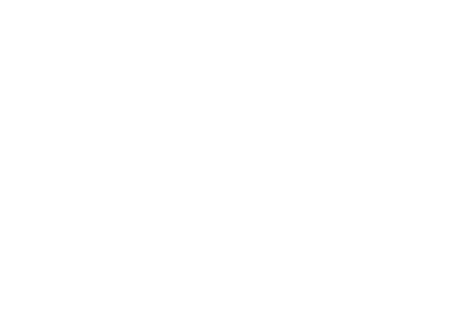

Data format detected: ohlcv
Starting Portfolio Value: 100000.00
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
===Strategy level arguments===
rsi_period : 14
rsi_upper : 70
rsi_lower : 30
2019-05-15, BUY CREATE, 293.00
2019-05-15, Cash: 100000.0
2019-05-15, Price: 293.0
2019-05-15, Buy prop size: 338
2019-05-15, Afforded size: 338
2019-05-15, Final size: 338
2019-05-16, BUY EXECUTED, Price: 293.00, Cost: 99034.00, Comm 742.75
2019-08-13, BUY CREATE, 217.40
2019-08-13, Cash: 223.24500000000012
2019-08-13, Price: 217.4
2019-08-13, Buy prop size: 1
2019-08-13, Afforded size: 1
2019-08-13, Final size: 1
2019-08-14, BUY EXECUTED, Price: 217.40, Cost: 217.40, Comm 1.63
Final Portfolio Value: 48311.714499999995
Final PnL: -51688.29
Number of strat runs: 1
Number of strats per run: 1
Strat names: [<class 'fastquant.strategies.rsi.RSIStrategy'>]
**************************************************
--------------------------------------------------
{

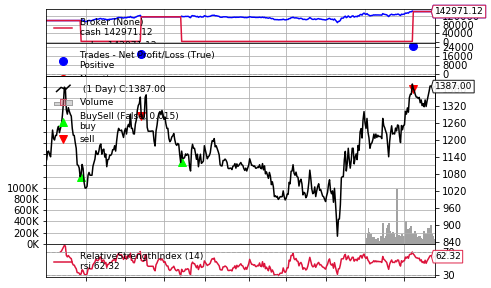

In [11]:
for x in range(0,len(workingtickers)):
    try:
        ticker = workingtickers[x]
        #rsi formula extraction and applicaton
        rsi = backtest("rsi",df[x],rsi_period=14,rsi_upper=70,rsi_lower=30)

        #save rsi graph as png
        plt.savefig(today+ticker+" RSI.png",figsize=(2,2),dpi = 90,plot=True)
    except:
        df[x].fillna(0,inplace=True)
        ticker = workingtickers[x]
        #rsi formula extraction and applicaton
        rsi = backtest("rsi",df[x],rsi_period=14,rsi_upper=70,rsi_lower=30)

        #save rsi graph as png
        plt.savefig(today+ticker+" RSI.png",figsize=(2,2),dpi = 90,plot=True)


Data format detected: ohlcv
Starting Portfolio Value: 100000.00
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
===Strategy level arguments===
fast_period : 12
slow_period : 26
signal_period : 9
sma_period : 30
dir_period : 10
2019-03-07, BUY CREATE, 320.00
2019-03-07, Cash: 100000.0
2019-03-07, Price: 320.0
2019-03-07, Buy prop size: 309
2019-03-07, Afforded size: 309
2019-03-07, Final size: 309
2019-03-08, BUY EXECUTED, Price: 320.00, Cost: 98880.00, Comm 741.60
2019-03-25, BUY CREATE, 316.00
2019-03-25, Cash: 378.4000000000001
2019-03-25, Price: 316.0
2019-03-25, Buy prop size: 1
2019-03-25, Afforded size: 1
2019-03-25, Final size: 1
2019-03-26, BUY EXECUTED, Price: 316.00, Cost: 316.00, Comm 2.37
2019-04-12, SELL CREATE, 310.00
2019-04-15, SELL EXECUTED, Price: 310.00, Cost: 99196.00, Comm 720.75
2019-04-15, OPERATION PROFIT, GROSS -3096.00, NET -4560.72
2019-05-09, BUY CREATE, 302.00
2019-05-09, Cash: 95439.28
2019-05-09, Price: 302.0

<IPython.core.display.Javascript object>


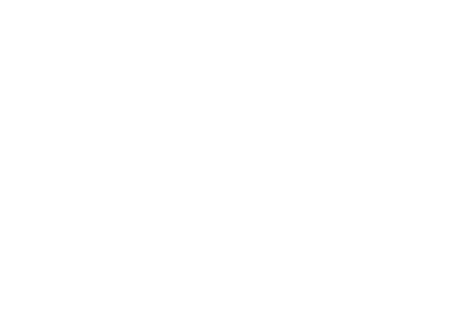

Data format detected: ohlcv
Starting Portfolio Value: 100000.00
===Global level arguments===
init_cash : 100000
buy_prop : 1
sell_prop : 1
commission : 0.0075
===Strategy level arguments===
fast_period : 12
slow_period : 26
signal_period : 9
sma_period : 30
dir_period : 10
2019-03-07, BUY CREATE, 1912.00
2019-03-07, Cash: 100000.0
2019-03-07, Price: 1912.0
2019-03-07, Buy prop size: 51
2019-03-07, Afforded size: 51
2019-03-07, Final size: 51
2019-03-08, BUY EXECUTED, Price: 1912.00, Cost: 97512.00, Comm 731.34
2019-04-04, SELL CREATE, 1908.00
2019-04-05, SELL EXECUTED, Price: 1908.00, Cost: 97512.00, Comm 729.81
2019-04-05, OPERATION PROFIT, GROSS -204.00, NET -1665.15
2019-05-06, BUY CREATE, 1865.00
2019-05-06, Cash: 98334.85
2019-05-06, Price: 1865.0
2019-05-06, Buy prop size: 52
2019-05-06, Afforded size: 52
2019-05-06, Final size: 52
2019-05-07, BUY EXECUTED, Price: 1865.00, Cost: 96980.00, Comm 727.35
2019-06-13, SELL CREATE, 2220.00
2019-06-14, SELL EXECUTED, Price: 2220.00, Cost

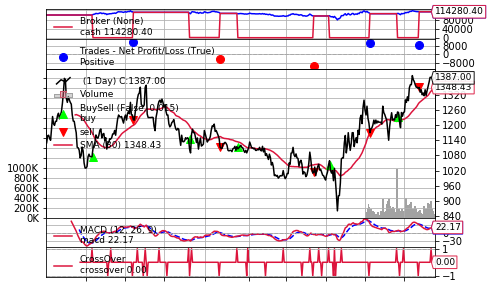

In [12]:
for x in range(0,len(workingtickers)): 
    try:
        ticker = workingtickers[x]
        #macd formula extraction and application
        macd = backtest('macd', df[x], fast_period=12, slow_period=26, signal_period=9, sma_period=30, dir_period=10)

        #save macd as png
        plt.savefig(today+ticker+" MACD.png",figsize=(2,2),dpi = 90,plot=True)
    except:
        df[x].fillna(0,inplace=True)
        ticker = workingtickers[x]
        #macd formula extraction and application
        macd = backtest('macd', df[x], fast_period=12, slow_period=26, signal_period=9, sma_period=30, dir_period=10)

        #save macd as png
        plt.savefig(today+ticker+" MACD.png",figsize=(2,2),dpi = 90,plot=True)

# <center> ----------------------------------------------------------------------------------------

## Inserting Graph PNG in Excel Sheet

In [13]:
for i in range(0,len(workingtickers)):
    ticker = workingtickers[i]
    
    #go to specific sheet
    workbook = load_workbook(filename=file)
    sheet = workbook.active
    sheet = workbook.get_sheet_by_name(ticker+"Data")

    #insert image to sheet
    img = Image(today+ticker+" Price Performance with Moving Averages.png")
    sheet.add_image(img, 'J4')
    img = Image(today+ticker+" Volume Performance with Moving Averages.png")
    sheet.add_image(img, 'J25')
    img = Image(today+ticker+" MACD.png")
    sheet.add_image(img, 'J46')
    img = Image(today+ticker+" RSI.png")
    sheet.add_image(img, 'S46')
    workbook.save(file)

## Excel Sheet Formatting - Fonts, Colors, & Column Names

In [14]:
#for the historical data sheets
col_names = ['0','A','B','C','D','E','F','G']

for i in range(0,len(workingtickers)):
    ticker = workingtickers[i]
    
    # Going to a specific file and sheet
    workbook = load_workbook(filename=file)
    sheet = workbook.active
    sheet = workbook.get_sheet_by_name(ticker+"Data")
    
    # Changing column and row dimensions
    sheet.row_dimensions[1].height = 20
    sheet.column_dimensions['A'].width = 23
    sheet.delete_cols(8)
    

    # Changing column names
    sheet['A1'] = "Date"
    sheet['B1'] = "Open (PHP)"
    sheet['C1'] = "Highest"
    sheet['D1'] = "Lowest"
    sheet['E1'] = "Close (PHP)"
    sheet['F1'] = "Value"
    sheet['G1'] = "Volume"
    
    #adding text above the images for labels
    fill = PatternFill(start_color='00FDEBC9',end_color='00FDEBC9',fill_type='solid')
    sheet.merge_cells('M44:N44')
    sheet['M44'] = "MACD"
    sheet['M44'].fill=fill
    sheet['M44'].alignment=Alignment(horizontal='center',vertical='center',wrap_text=True,)
    sheet.merge_cells('V44:W44')
    sheet['V44'] = "RSI"
    sheet['V44'].fill=fill
    sheet['V44'].alignment=Alignment(horizontal='center',vertical='center',wrap_text=True,)
    
    #for all rows and all columns
    max_row = sheet.max_row
    max_col = sheet.max_column
    
    #change all fonts and font sizes
    for i in range(1,max_row+1):
        for j in range(1,max_col+1):
            ft = Font(name='Arial', size=12)
            cell = sheet.cell(row=i,column=j)
            cell.font=ft
   
    #filling the cells with colors except row 1
    for v in range(1,len(col_names)):
        for b in range(1,max_row+1):
            if sheet.cell(row=b,column=1).value != None:
                if b%2 != 0:
                    cell = sheet.cell(row=b,column=v)
                    fill = PatternFill(start_color='00FDEBC9',end_color='00FDEBC9',fill_type='solid')
                    cell.fill = fill
                    continue
                else:
                    continue
            else:
                pass 
            
    #fill row 1 with color        
    for k in range(1,len(col_names)):
        col = col_names[k]
        sheet.column_dimensions[col].auto_size = True
        cell = sheet.cell(row=1,column=k)
        cell.alignment=Alignment(horizontal='center',
                     vertical='center',
                     text_rotation=0,
                     wrap_text=True,
                     shrink_to_fit=False,
                     indent=0)
        fill = PatternFill(start_color='00FFDFA2',end_color='00FFDFA2',fill_type='solid')
        cell.fill = fill

        
    workbook.save(file)

## More Excel Sheet Formatting - Percent Change Colors, Aligning

In [15]:
#for stock quotes sheet

col_names = ['0','A','B','C','D','E']

workbook = load_workbook(filename=file)
sheet = workbook.active
sheet = workbook.get_sheet_by_name("Stock Quotes")

sheet.column_dimensions['A'].width = 23
sheet.column_dimensions['E'].width = 15
max_row = sheet.max_row
max_col = sheet.max_column
sheet.delete_cols(1)

#change all fonts and font sizes
for i in range(1,max_row+1):
    for j in range(1,max_col+1):
        ft = Font(name='Arial', size=12)
        cell = sheet.cell(row=i,column=j)
        cell.font=ft

#filling the cells with colors except row 1
for v in range(1,len(col_names)):
    for b in range(1,max_row+1):
        if sheet.cell(row=b,column=1).value != None:
            if b%2 != 0:
                cell = sheet.cell(row=b,column=v)
                fill = PatternFill(start_color='00F8F6BC',end_color='00FEEDD0',fill_type='solid')
                cell.fill = fill
                continue
            else:
                continue
        else:
            pass 
        
for k in range(2,max_row+1):
    cell = sheet.cell(row=k,column=4)
    
    if float(sheet.cell(row=k,column=4).value) < 0:
        fill = PatternFill(start_color='00FF4500',end_color='00FF4500',fill_type='solid')
        cell.fill = fill
    
    elif float(sheet.cell(row=k,column=4).value) > 0:
        fill = PatternFill(start_color='0090EE90',end_color='0090EE90',fill_type='solid')
        cell.fill = fill
        
    elif float(sheet.cell(row=k,column=4).value) == 0:
        fill = PatternFill(start_color='00D8D2CF',end_color='00D8D2CF',fill_type='solid')
        cell.fill = fill

#fill row 1 with color        
for k in range(1,len(col_names)):
    col = col_names[k]
    cell = sheet.cell(row=1,column=k)
    #fixes row alignment and wraps text
    cell.alignment=Alignment(horizontal='center',
                     vertical='center',
                     text_rotation=0,
                     wrap_text=True,
                     shrink_to_fit=False,
                     indent=0)
    fill = PatternFill(start_color='00FFF29B',end_color='00FFF29B',fill_type='solid')
    cell.fill = fill 
    

workbook.save(file)